In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
def read_pandas(file):
    read_data = pd.read_csv(file)

    data = pd.DataFrame({"date": read_data.Date, "temperature":read_data.tmps})
    data.temperature = data.temperature - 273.15
    data.date = pd.to_datetime(data.date)
    data.dropna(inplace=True)
    
    return data


df = read_pandas("C:\\Users\\Mihailo Jankov\\Desktop\\Praktikum\\Termin5\\GDAS_2017_2019_IPH.csv")

In [3]:

#Uzimanje srednje temperature i std po danu
lista = []
count = 0
dan = None
srednja_temp = 0.0
std_list = []

for index, row in df.iterrows():
  if dan == None or dan != row[0].day:
    if len(std_list) > 0:
      datum = datetime.datetime(row[0].year, row[0].month, row[0].day)

      mean = sum(std_list) / len(std_list) 
      variance = sum([((x - mean) ** 2) for x in std_list]) / len(std_list) 
      res = variance ** 0.5
                                
      lista.append({"date": datum, 
                    "srednja_temp": srednja_temp/count, 
                    "std": res})

    dan = row[0].day
    srednja_temp = 0.0
    count = 0
    std_list = []

  srednja_temp += row[1]
  std_list.append(row[1])
  count +=1


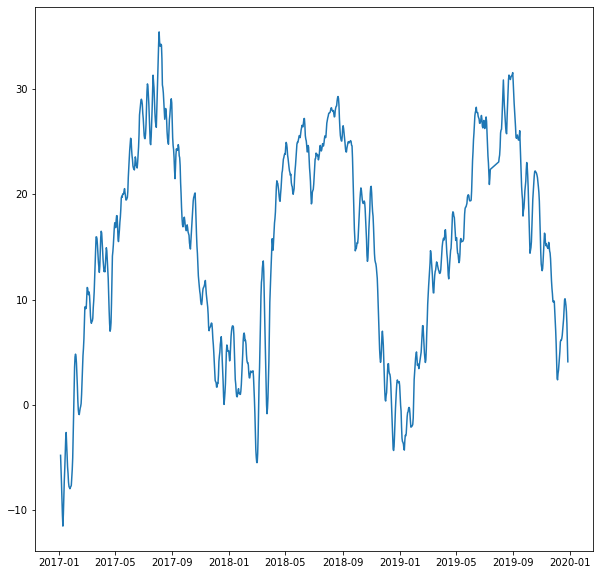

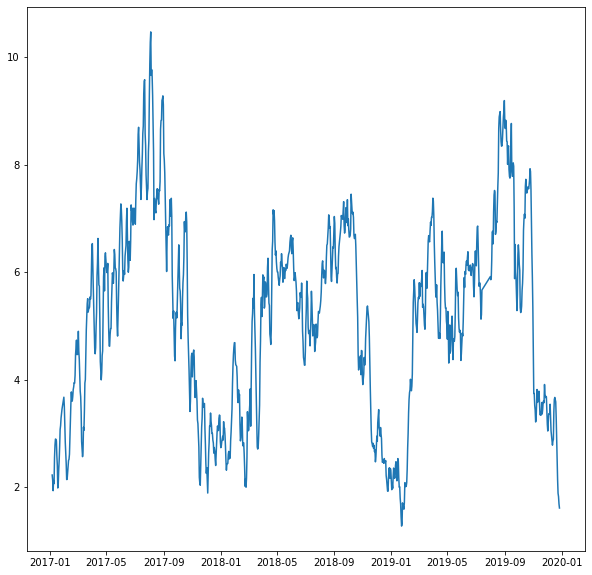

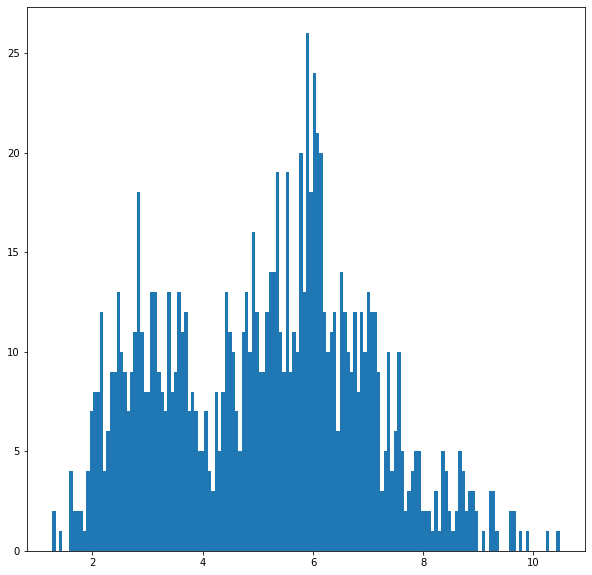

In [4]:

#Racunanje srednje temperature i std po principu -3 +3
new_list = []
lista_za_proveru = []
srednja_temp = 0
std = 0

for i in range(0, len(lista)):
    if i < 7:
        lista_za_proveru.append(lista[i])
    else:
        for t in range(len(lista_za_proveru)):
            if i != 3:
                srednja_temp+=lista_za_proveru[t]["srednja_temp"]
                std+=lista_za_proveru[t]["std"]
            
        srednja_temp = srednja_temp/(len(lista_za_proveru)-1)
        std = std/(len(lista_za_proveru)-1)

        new_list.append({"date":lista_za_proveru[3]["date"], "srednja_temp":srednja_temp, "std":std})
        lista_za_proveru.pop(0)
        lista_za_proveru.append(lista[i])
        srednja_temp = 0
        std = 0

df = pd.DataFrame(new_list)
df


plt.figure(figsize=(10,10))
plt.plot(df.date, df.srednja_temp)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(df.date, df["std"])
plt.show()

plt.figure(figsize=(10,10))
plt.hist(df.srednja_temp, 150)
plt.show()

plt.figure(figsize=(10,10))
plt.hist(df["std"], 150)
plt.show()
